**Abstract:**<br>
Source: https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees

Context:<br>

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

Goal:<br>
Predict the productivity of employee in terms of percentage % of work delivered by employees.

Content:<br>

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

<h3>Attribute Information:</h3>
<li>date : Date in MM-DD-YYYY </li>
<li>day : Day of the Week</li>
<li>quarter : A portion of the month. A month was divided into four quarters</li>
<li>department : Associated department with the instance</li>
<li>teamno : Associated team number with the instance </li>
<li>noofworkers : Number of workers in each team </li>
<li>noofstylechange : Number of changes in the style of a particular product</li>
<li>targetedproductivity : Targeted productivity set by the Authority for each team for each day. </li>
<li>smv : Standard Minute Value, it is the allocated time for a task </li>
<li>wip : Work in progress. Includes the number of unfinished items for products </li>
<li>overtime : Represents the amount of overtime by each team in minutes</li>
<li>incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.</li>
<li>idletime : The amount of time when the production was interrupted due to several reasons </li>
<li>idlemen : The number of workers who were idle due to production interruption</li>
<li>actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.</li>

In [239]:
#Installing required packages
!pip install h2o
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future



# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
# # Note: When installing H2O from !pip in OS X El Capitan, users must include the --user flag.

# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --user
# # See Downloading & Installing H2O http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html

In [240]:
# Set a minimum memory size and a run time in seconds
min_mem_size=7
run_time=222
# Train AutoML

In [241]:
#Import Required Packages
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [242]:
#Ingesting the Dataset into the dataframe
h2o.init()
url = "https://raw.githubusercontent.com/midhunmohank/AutoML/main/garments_worker_productivity.csv"
df = h2o.import_file(path = url)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 45 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_xfyjug
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.027 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [243]:
X = (df.columns)
for i in X:
    print(i)

date
quarter
department
day
team
targeted_productivity
smv
wip
over_time
incentive
idle_time
idle_men
no_of_style_change
no_of_workers
actual_productivity


<h3>Attribute Information:</h3>
<li>date : Date in MM-DD-YYYY  </li>
<li>day : Day of the Week </li>
<li>quarter : A portion of the month. A month was divided into four quarters </li>
<li>department : Associated department with the instance </li>
<li>teamno : Associated team number with the instance </li>
<li>noofworkers : Number of workers in each team </li>
<li>noofstylechange : Number of changes in the style of a particular product </li>
<li>targetedproductivity : Targeted productivity set by the Authority for each team for each day. </li>
<li>smv : Standard Minute Value, it is the allocated time for a task </li>
<li>wip : Work in progress. Includes the number of unfinished items for products </li>
<li>overtime : Represents the amount of overtime by each team in minutes </li>
<li>incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action. </li>
<li>idletime : The amount of time when the production was interrupted due to several reasons </li>
<li>idlemen : The number of workers who were idle due to production interruption </li>
<li>actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.</li>

In [244]:
#Checking the Data Types
df.types

{'actual_productivity': 'real',
 'date': 'time',
 'day': 'enum',
 'department': 'enum',
 'idle_men': 'int',
 'idle_time': 'real',
 'incentive': 'int',
 'no_of_style_change': 'int',
 'no_of_workers': 'real',
 'over_time': 'int',
 'quarter': 'enum',
 'smv': 'real',
 'targeted_productivity': 'real',
 'team': 'int',
 'wip': 'int'}

In [245]:
df.head(5)

date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2015-01-01 00:00:00,Quarter1,sweing,Thursday,8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725
2015-01-01 00:00:00,Quarter1,finishing,Thursday,1,0.75,3.94,nan,960,0,0,0,0,8,0.8865
2015-01-01 00:00:00,Quarter1,sweing,Thursday,11,0.8,11.41,968,3660,50,0,0,0,30.5,0.80057
2015-01-01 00:00:00,Quarter1,sweing,Thursday,12,0.8,11.41,968,3660,50,0,0,0,30.5,0.80057
2015-01-01 00:00:00,Quarter1,sweing,Thursday,6,0.8,25.9,1170,1920,50,0,0,0,56,0.800382


<h3>Splitting the dataframe into Train and Test dataframes:</h3>

In [246]:
#Split the data by 80/20 for training and testing 

train, test = df.split_frame(ratios = [0.80])

In [247]:
print('Dataset Shape:{} ,Train Dataset Shape:{} , Test Dataset Shape: {}'.format(df.shape,train.shape,test.shape))

Dataset Shape:(1197, 15) ,Train Dataset Shape:(971, 15) , Test Dataset Shape: (226, 15)


In [248]:
#Setting Features 
x = train.columns
print(x)

['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


In [249]:
#Setting Targets

y = 'actual_productivity'
x.remove(y)
print(x)

['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']


In [250]:
max_models = 20
min_mem_size=6 
run_time=222
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)


<h3>Regression</h3>

In [251]:
aml.train(x=x,y=y, training_frame=train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%

04:21:42.149: GBM_lr_annealing_selection_AutoML_5_20220214_41756 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_5_20220214_41756

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.003316650291787141
RMSE: 0.05759036631058306
MAE: 0.036564891357874926
RMSLE: 0.03583510508838118
R^2: 0.892387955673909
Mean Residual Deviance: 0.003316650291787141
Null degrees of freedom: 970
Residual degrees of freedom: 966
Null deviance: 29.926644861114188
Residual deviance: 3.2204674333253136
AIC: -2775.6661235024594

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.013640065828757085
RMSE: 0.1167906923

In [252]:
#Checking model-wise accuracy 

print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_4_AutoML_5_20220214_41756,0.0136401,0.116791,0.0136401,0.0743052,0.0720599
StackedEnsemble_BestOfFamily_3_AutoML_5_20220214_41756,0.013689,0.117,0.013689,0.0745044,0.0722237
StackedEnsemble_AllModels_2_AutoML_5_20220214_41756,0.0137652,0.117325,0.0137652,0.0745843,0.0723745
StackedEnsemble_BestOfFamily_2_AutoML_5_20220214_41756,0.0138445,0.117662,0.0138445,0.0748264,0.0728341
GBM_5_AutoML_5_20220214_41756,0.0138498,0.117685,0.0138498,0.0752237,0.0725213
StackedEnsemble_AllModels_3_AutoML_5_20220214_41756,0.0140596,0.118573,0.0140596,0.0759781,0.0734201
StackedEnsemble_AllModels_1_AutoML_5_20220214_41756,0.014099,0.118739,0.014099,0.0754341,0.0734346
StackedEnsemble_AllModels_4_AutoML_5_20220214_41756,0.0141006,0.118746,0.0141006,0.076089,0.073532
DRF_1_AutoML_5_20220214_41756,0.0141626,0.119007,0.0141626,0.0765129,0.0738027
GBM_grid_1_AutoML_5_20220214_41756_model_2,0.0142602,0.119416,0.0142602,0.0776241,0.0737398


In [253]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_5_20220214_41756

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.003316650291787141
RMSE: 0.05759036631058306
MAE: 0.036564891357874926
RMSLE: 0.03583510508838118
R^2: 0.892387955673909
Mean Residual Deviance: 0.003316650291787141
Null degrees of freedom: 970
Residual degrees of freedom: 966
Null deviance: 29.926644861114188
Residual deviance: 3.2204674333253136
AIC: -2775.6661235024594

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.013640065828757085
RMSE: 0.11679069238923573
MAE: 0.07430524887961062
RMSLE: 0.0720598615132891
R^2: 0.5574343872763152
Mean Residual Deviance: 0.013640065828757085
Null degrees of freedom: 970
Residual degrees of freedom: 964
Null deviance: 29.985379970934652
Residual deviance: 13.24450391972313
AIC: -1398.6175987275064



**RMSE Comparison and Understanding the Leaderboard:**

In [271]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_5_AutoML_5_20220214_41756': 4,
 'GLM_1_AutoML_5_20220214_41756': 67,
 'StackedEnsemble_AllModels_2_AutoML_5_20220214_41756': 2,
 'StackedEnsemble_BestOfFamily_2_AutoML_5_20220214_41756': 3,
 'StackedEnsemble_BestOfFamily_3_AutoML_5_20220214_41756': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_5_20220214_41756': 0}

**Examining the Best Model:**

In [272]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

4


In [273]:
best_model.algo

'gbm'

In [256]:
best_model.algo

'gbm'

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

**Partail Dependence Plots:**

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_5_AutoML_5_20220214_41756 on column 'targeted_productivity'.


,targeted_productivity,mean_response,stddev_response,std_error_mean_response
0,0.070000,0.587996,0.127120,0.003674
1,0.108421,0.587996,0.127120,0.003674
2,0.146842,0.587996,0.127120,0.003674
3,0.185263,0.587996,0.127120,0.003674
4,0.223684,0.576062,0.135877,0.003927
5,0.262105,0.576062,0.135877,0.003927
6,0.300526,0.576062,0.135877,0.003927
7,0.338947,0.576062,0.135877,0.003927
8,0.377368,0.574097,0.132637,0.003834
9,0.415789,0.574905,0.132626,0.003833


[]

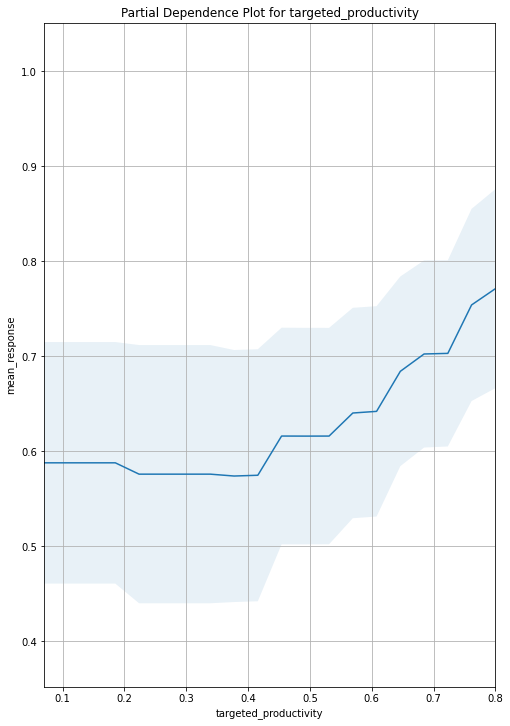

In [265]:
best_model.partial_plot(df, cols=['targeted_productivity'])

67
glm


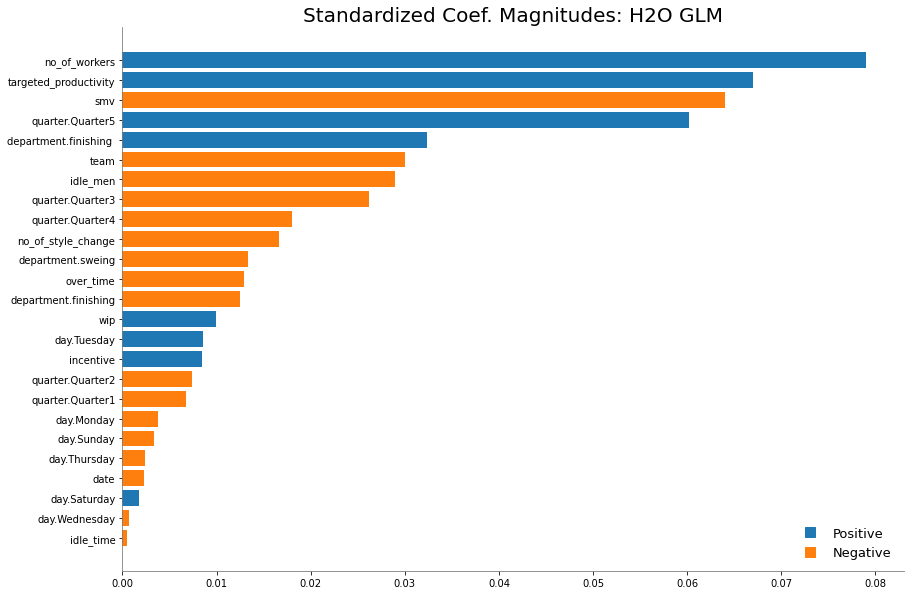

In [281]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [276]:
# Best model rmse
print(best_model.rmse(train = True))


0.06699101396601273


In [277]:
# Fitting the best model for predictions

predictions = best_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [278]:
y_pred=h2o.as_list(predictions)
y_pred = pd.DataFrame(y_pred)
y_pred[0:5]


,predict
0,0.800978
1,0.813602
2,0.745908
3,0.604298
4,0.684270


In [279]:
# #Checking for fit
# RMSE of test > RMSE of train => OVER FITTING of the data.

# RMSE of test < RMSE of train => UNDER FITTING of the data.
import numpy as np
# test_known_values = train['targeted productivity']
test_known_values = h2o.as_list(train['targeted_productivity'], use_pandas=True)
test_known_values = pd.DataFrame(test_known_values)
test_known_values.head()
frame = [test_known_values,y_pred]
ActVsPred = pd.concat(frame,axis = 1, join = 'inner')
ActVsPred.head()

,targeted_productivity,predict
0,0.80,0.800978
1,0.75,0.813602
2,0.80,0.745908
3,0.80,0.604298
4,0.75,0.684270


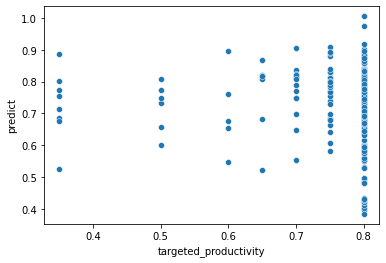

In [280]:
import seaborn as sns
# sns.lmplot(x='targeted_productivity',y='predict',data=ActVsPred,fit_reg=False)
# line_coords = np.arange(ActualVsPred.min().min(), ActVsPred.max().max())
# plt.plot(line_coords, line_coords,  # X and y points
#              color='darkorange', linestyle='--')


sns.scatterplot(x='targeted_productivity', y='predict', data=ActVsPred)

In [263]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true = ActVsPred.targeted_productivity, y_pred = ActVsPred.predict)
MSE = MSE**(0.5)
print("The RMSE of the predicted test data is: {}".format(MSE))

The RMSE of the predicted test data is: 0.16085593426334607


<h3>Does the model make sense?</h3>

The model does is not a good for the dataset since the actual and the predicted values of the employee performance does not form a linear correlation when scattered and the RMSE of 0.16 makes a major portion of the performance range (0.00 to 1.00)

In [266]:
df_pd = pd.read_csv(url)

In [267]:
df_pd.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [268]:
corr = df_pd.corr()

<h3>In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.</h3>

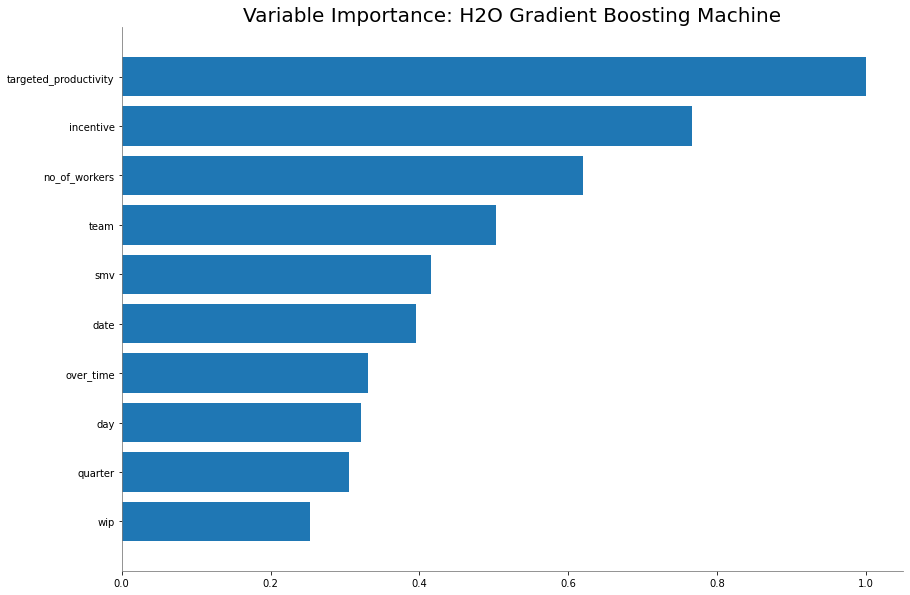

<Figure size 432x288 with 0 Axes>

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline

if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()


<h3>Is the relationship significant?</h3>
There is a significant relationship between number of workers and smv.

In [269]:
corr.style.background_gradient(cmap='coolwarm')

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


<h3>Which independent variables are significant?</h3>

Incentives is the most significant variable.

<h3> Does regularization help?</h3>

Since the RMSE of the trained data is 0.066 and the test data is 0.16, 
RMSE of test > RMSE of train => OVER FITTING of the data. So regularization can be used to improve the fit of the Data

Conclusion:
It can be concluded from the model that although Gradient Boosting Machine (GBM) is a great algotithm. A proper result cannot be achieved without properly evaluating the dataset. 

**References:**



1. Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT).
2. Productivity Prediction of Garment Employees
Regression/ classification purpose - https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees
3. Generalized linear model (GLM)¶. Generalized Linear Model (GLM) - H2O 3.36.0.2 documentation. (2022, January 25). Retrieved February 13, 2022, from https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html
4. Nikbearbrown. (2022, January 26). AI_Research_Group/VAI_Churn_H2O_automl.ipynb at main · nikbearbrown/ai_research_group. GitHub. Retrieved February 13, 2022, from https://github.com/nikbearbrown/AI_Research_Group/blob/main/Kaggle_Datasets/AutoML/VAI_Churn_H2O_automl.ipynb



